In [1]:
import pandas as pd
import numpy as np
from category_encoders.target_encoder import TargetEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from  scipy import stats
from scipy.special import boxcox
import os 
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, recall_score, precision_score, average_precision_score, precision_recall_curve
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE ,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
from collections import Counter
from sklearn.metrics import make_scorer
from time import time
import lightgbm as light
import catboost as cat
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler 

import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,KFold,TimeSeriesSplit,GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              RandomForestClassifier, RandomForestRegressor,AdaBoostClassifier) 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgbm
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score


Using TensorFlow backend.


In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [151]:
#kaglle = train[train['locdt']>80]

In [152]:
#train = train[train['locdt']<=80]

In [5]:
train_index = pd.DataFrame(train['txkey'])
test_index = pd.DataFrame(test['txkey'])
#kaggle_index = pd.DataFrame(kaggle['txkey'])

In [6]:
#kaggle_ans  = kaggle['fraud_ind']
#kaggle_ans = pd.DataFrame(kaggle_ans)
#kaggle_ans['txkey'] = kaggle['txkey']

In [7]:
#kaggle.drop('fraud_ind',axis=1,inplace=True)

In [8]:
data_all = pd.concat([train,test],axis=0,sort=False)

In [157]:
#data_all = data_all.reset_index()

In [158]:
#data_all = data_all.drop('index',axis=1)

# fillna

In [9]:
data_all['flbmk'].fillna('N', inplace=True)
data_all['flg_3dsmk'].fillna('N', inplace=True)

## pre

In [10]:
def preprocessing(data_all) :
    grp = data_all.groupby(['bacno'])['conam'].min().reset_index().rename(columns={'conam':'comsum_min'})
    
    data_all = data_all.merge(grp,how='left')
    
    grp = data_all.groupby(['bacno'])['conam'].max().reset_index().rename(columns={'conam':'comsum_max'})
    
    data_all = data_all.merge(grp,how='left')
    
    grp = (data_all.groupby(['bacno'])['txkey'].count() / data_all['locdt'].max()).reset_index().rename(columns={'txkey':'acc_trad_ave'})
    data_all = data_all.merge(grp,how='left')
    grp = data_all.groupby(['bacno'])['txkey'].count().reset_index().rename(columns={'txkey':'acc_trad_total'})
    data_all = data_all.merge(grp,how='left')
    grp = data_all.groupby(['bacno'])['conam'].sum().reset_index().rename(columns={'conam':'comsum_total'})
    data_all = data_all.merge(grp,how='left')
    grp = data_all.groupby(['bacno'])['conam'].mean().reset_index().rename(columns={'conam':'comsum_ave'})
    data_all = data_all.merge(grp,how='left')
    day30 = data_all[data_all['locdt'] <= 30]
    grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq30'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq30'].fillna(0,inplace=True)

    day30 = data_all[(data_all['locdt'] <= 60) & (data_all['locdt'] >30 ) ]
    grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq3060'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq3060'].fillna(0,inplace=True)

    day30 = data_all[(data_all['locdt'] <= 90) & (data_all['locdt'] >60 ) ]
    grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq6090'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq6090'].fillna(0,inplace=True)

    day30 = data_all[(data_all['locdt'] <= 120) & (data_all['locdt'] >90 ) ]
    grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq90120'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq90120'].fillna(0,inplace=True)

    day60 = data_all[data_all['locdt'] <= 60]
    grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq60'].fillna(0,inplace=True)

    day60 = data_all[(data_all['locdt'] <= 90) & (data_all['locdt'] >30 ) ]
    grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq3090'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq3090'].fillna(0,inplace=True)

    day60 = data_all[(data_all['locdt'] <= 120) & (data_all['locdt'] >60 ) ]
    grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60120'})
    data_all = data_all.merge(grp,how='left')
    data_all['comsum_feq60120'].fillna(0,inplace=True)

    grp = data_all.groupby(['locdt'])['bacno'].count().reset_index().rename(columns={'bacno':'day_trad_num'})
    data_all = data_all.merge(grp,how='left')
    grp = data_all.groupby(['locdt'])['conam'].sum().reset_index().rename(columns={'conam':'day_comsum_total'})
    data_all = data_all.merge(grp,how='left')

    data_all['ecfg_stocn'] = data_all['ecfg'] + data_all['stocn'].astype('str')
    data_all['ecfg_scity'] = data_all['ecfg'] + data_all['scity'].astype('str')

    data_all['ovrlt_stocn'] = data_all['ovrlt'] + data_all['stocn'].astype('str')
    data_all['ovrlt_scity'] = data_all['ovrlt'] + data_all['stocn'].astype('str')

    data_all['week'] = data_all['locdt']
    data_all['week'] = data_all['week'] % 7 
    

    data_all['trad_hour'] = data_all['loctm'] // 10000

    data_all['morning'] = ((data_all['trad_hour'] < 12) & (data_all['trad_hour'] >=6)).replace([True,False],[1,0])
    data_all['afternoon'] = ((data_all['trad_hour'] < 18) & (data_all['trad_hour'] >=12)).replace([True,False],[1,0])
    data_all['night'] = ((data_all['trad_hour'] < 24) & (data_all['trad_hour'] >=18)).replace([True,False],[1,0])
    data_all['midnight'] = ((data_all['trad_hour'] < 6) & (data_all['trad_hour'] >=0)).replace([True,False],[1,0])

    data_all['is_taiwan'] = (data_all['stocn'] == 102).replace([True,False],[1,0])

    grp = data_all.groupby(['stocn'])['txkey'].count().reset_index().rename(columns={'txkey':'country_com_num'})
    data_all = data_all.merge(grp,how='outer')

    grp = data_all.groupby(['scity'])['txkey'].count().reset_index().rename(columns={'txkey':'city_com_num'})
    data_all = data_all.merge(grp,how='outer')
    
    return data_all

In [ ]:
data_all.groupby(['bacno'])['locdt']

In [11]:
data_all = preprocessing(data_all)

In [12]:
object_list = []
int_list = []
float_list = []
for col in data_all.columns.tolist():
    if data_all[col].dtype == 'object':
        object_list.append(col)
    if data_all[col].dtype == 'int64':
        int_list.append(col)
    if data_all[col].dtype == 'float64':
        float_list.append(col)

nd_ont_list = []
nd_tar_list = []
for col in object_list:

    if len(data_all[col].unique()) < 5:
        nd_ont_list.append(col)

    else:
        nd_tar_list.append(col)

In [13]:
for col in nd_ont_list :
    data_all =pd.concat([data_all] + [pd.get_dummies(data_all[col],prefix=col)] ,axis=1)
data_all.drop(nd_ont_list,axis=1,inplace=True)

In [14]:
from sklearn import preprocessing

In [15]:
le = preprocessing.LabelEncoder()
for col in nd_tar_list :
    data_all[col] = le.fit_transform(data_all[col])

In [ ]:
tar = TargetEncoder(smoothing=0.9).fit(train[nd_tar_list],train['ans'])
tar.transform(test[nd_tar_list])
tar.transform(train[nd_tar_list])

In [16]:
#data_all[nd_tar_list] = target.transform(data_all[nd_tar_list])
#data_all[nd_tar_list]  = target.transform(data_all[nd_tar_list])

In [18]:
training = data_all.merge(train_index)
testing = data_all.merge(test_index)
#kaggle_ = data_all.merge(kaggle_index) 

In [19]:
print('train',training.shape , 'test', testing.shape)

train (1521787, 56) test (421665, 56)


In [20]:
testing = testing.drop('fraud_ind',axis=1)
#kaggle_ = kaggle_.drop('fraud_ind',axis=1)

In [21]:
print('train',training.shape , 'test', testing.shape)

train (1521787, 56) test (421665, 55)


In [22]:
from sklearn.model_selection import KFold , cross_val_score , train_test_split
import lightgbm as lig

In [95]:
lig_mo = lig.LGBMClassifier(n_estimators=600,reg_alpha=0.3,num_leaves=100,learning_rate=0.1,reg_lambda=0.5,subsample=0.7,is_unbalance=True)

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
X , tx , Y ,ty = train_test_split(training.drop(['cano','bacno','fraud_ind','txkey','locdt'],axis=1),training['fraud_ind'],test_size=0.3,random_state =1102)

## ligbm adasyn

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class After oversampling the data
Counter({0.0: 1501432, 1.0: 1495539})
Train Time: 5.953677415847778
Prediction Time: 5.89621114730835
fbeta score_train: 0.7602142057596417
recall_score_train: 0.8415827642047454
precision_score_train: 0.5482021647404146
Train Time: 5.953677415847778
Prediction Time: 5.89621114730835
fbeta score: 0.7584938961612002
recall_score: 0.8382639791937582
precision_score: 0.5493767976989453

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    450385
         1.0       0.55      0.84      0.66      6152

    accuracy                           0.99    456537
   macro avg       0.77      0.91      0.83    456537
weighted avg       0.99      0.99      0.99    456537



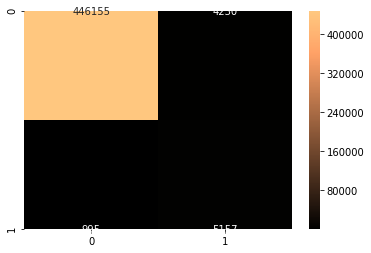

In [143]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(
    ['cano', 'bacno', 'txkey', 'locdt', 'fraud_ind'], axis=1),
                                                        training['fraud_ind'],
                                                        test_size=0.3,
                                                        random_state=112)

ad_data = training.drop(['cano', 'bacno', 'txkey', 'locdt'], axis=1)

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(ad_data['fraud_ind'].value_counts())

X_ad = ad_data.drop('fraud_ind', axis=1)
y_ad = ad_data['fraud_ind']
start = time()
# Oversampling the data using SMOTE

X_resampled_ad, y_resampled_ad = ADASYN(
    sampling_strategy='minority').fit_sample(X_ad, y_ad)
end = time()
print("No. of 0's and 1's in the feature Class After oversampling the data")
print(Counter(y_resampled_ad))
results = {}

# Initializng the dictionary to store performance metrics
results['ad'] = {}
results['ad']['resample_time'] = end - start

X_resampled_ad, y_resampled_ad = RandomUnderSampler(sampling_strategy={
    1: 200000,
    0: 200000
}).fit_resample(X_resampled_ad, y_resampled_ad)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_ad,
                                                    y_resampled_ad,
                                                    test_size=0.3,
                                                    random_state=112)

# Training the classifier
start = time()
clf_ad_BF = lig.LGBMClassifier(n_estimators=300,
                               reg_alpha=0.3,
                               num_leaves=100,
                               max_depth=16,
                               learning_rate=0.1,
                               reg_lambda=0.5,
                               subsample=0.7).fit(X_train, y_train)
end = time()
results['ad']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score_ad = clf_ad_BF.predict(X_test1)
y_score_ad = clf_ad_BF.predict(X_train1)

end = time()
results['ad']['pred_time'] = end - start

results['ad']['fbeta_train'] = fbeta_score(y_train1, y_score_ad, beta=2)
results['ad']['recall_train'] = recall_score(y_train1, y_score_ad)
results['ad']['precision_train'] = precision_score(y_train1, y_score_ad)

results['ad']['fbeta_test'] = fbeta_score(y_test1, y_pred_score_ad, beta=2)
results['ad']['recall_test'] = recall_score(y_test1, y_pred_score_ad)
results['ad']['precision_test'] = precision_score(y_test1, y_pred_score_ad)

print("Train Time:", results['ad']['train_time'])
print("Prediction Time:", results['ad']['pred_time'])
print("fbeta score_train:", results['ad']['fbeta_train'])
print('recall_score_train:', results['ad']['recall_train'])
print('precision_score_train:', results['ad']['precision_train'])

print('========================================================')
print("Train Time:", results['ad']['train_time'])
print("Prediction Time:", results['ad']['pred_time'])
print("fbeta score:", results['ad']['fbeta_test'])
print('recall_score:', results['ad']['recall_test'])
print('precision_score:', results['ad']['precision_test'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score_ad))

conf_matrix = confusion_matrix(y_test1, y_pred_score_ad)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class After oversampling the data
Counter({0.0: 1501432, 1.0: 1495539})
[1]	training's binary_logloss: 0.613243	training's f1: 0.951647	valid_1's binary_logloss: 0.61348	valid_1's f1: 0.950616
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.547802	training's f1: 0.953043	valid_1's binary_logloss: 0.548031	valid_1's f1: 0.952352
[3]	training's binary_logloss: 0.492964	training's f1: 0.95432	valid_1's binary_logloss: 0.493371	valid_1's f1: 0.952818
[4]	training's binary_logloss: 0.446543	training's f1: 0.954227	valid_1's binary_logloss: 0.447151	valid_1's f1: 0.953153
[5]	training's binary_logloss: 0.406572	training's f1: 0.956003	valid_1's binary_logloss: 0.407345	valid_1's f1: 0.954287
[6]	training's binary_logloss: 0.372417	training's f1: 0.956064	valid_1's binary_logloss: 0.373

[65]	training's binary_logloss: 0.0516076	training's f1: 0.983061	valid_1's binary_logloss: 0.0534735	valid_1's f1: 0.981515
[66]	training's binary_logloss: 0.0506426	training's f1: 0.983455	valid_1's binary_logloss: 0.0525752	valid_1's f1: 0.982316
[67]	training's binary_logloss: 0.0493412	training's f1: 0.984043	valid_1's binary_logloss: 0.0512393	valid_1's f1: 0.98325
[68]	training's binary_logloss: 0.0487704	training's f1: 0.984229	valid_1's binary_logloss: 0.0507076	valid_1's f1: 0.98325
[69]	training's binary_logloss: 0.0478827	training's f1: 0.984522	valid_1's binary_logloss: 0.0498129	valid_1's f1: 0.983517
[70]	training's binary_logloss: 0.0473671	training's f1: 0.984732	valid_1's binary_logloss: 0.0493082	valid_1's f1: 0.983584
[71]	training's binary_logloss: 0.0467746	training's f1: 0.984983	valid_1's binary_logloss: 0.0486516	valid_1's f1: 0.984051
[72]	training's binary_logloss: 0.0462204	training's f1: 0.985257	valid_1's binary_logloss: 0.0481001	valid_1's f1: 0.984117
[7

[131]	training's binary_logloss: 0.026759	training's f1: 0.992902	valid_1's binary_logloss: 0.0285806	valid_1's f1: 0.991992
[132]	training's binary_logloss: 0.0266101	training's f1: 0.992969	valid_1's binary_logloss: 0.028487	valid_1's f1: 0.991925
[133]	training's binary_logloss: 0.0264139	training's f1: 0.993051	valid_1's binary_logloss: 0.0282749	valid_1's f1: 0.991859
[134]	training's binary_logloss: 0.0262274	training's f1: 0.993125	valid_1's binary_logloss: 0.0281131	valid_1's f1: 0.991925
[135]	training's binary_logloss: 0.0260301	training's f1: 0.993236	valid_1's binary_logloss: 0.0279234	valid_1's f1: 0.992125
[136]	training's binary_logloss: 0.0259126	training's f1: 0.993279	valid_1's binary_logloss: 0.0277867	valid_1's f1: 0.992259
[137]	training's binary_logloss: 0.025729	training's f1: 0.993344	valid_1's binary_logloss: 0.0275965	valid_1's f1: 0.992259
[138]	training's binary_logloss: 0.0256031	training's f1: 0.993407	valid_1's binary_logloss: 0.0274441	valid_1's f1: 0.99

[197]	training's binary_logloss: 0.0187199	training's f1: 0.995766	valid_1's binary_logloss: 0.0206303	valid_1's f1: 0.994661
[198]	training's binary_logloss: 0.0186429	training's f1: 0.995787	valid_1's binary_logloss: 0.0205584	valid_1's f1: 0.994728
[199]	training's binary_logloss: 0.0185676	training's f1: 0.995803	valid_1's binary_logloss: 0.0204834	valid_1's f1: 0.994728
[200]	training's binary_logloss: 0.0185089	training's f1: 0.995823	valid_1's binary_logloss: 0.0204266	valid_1's f1: 0.994728
[201]	training's binary_logloss: 0.0184225	training's f1: 0.995857	valid_1's binary_logloss: 0.0203371	valid_1's f1: 0.994861
[202]	training's binary_logloss: 0.0183477	training's f1: 0.995877	valid_1's binary_logloss: 0.0202737	valid_1's f1: 0.994861
[203]	training's binary_logloss: 0.0182506	training's f1: 0.995909	valid_1's binary_logloss: 0.0201858	valid_1's f1: 0.994928
[204]	training's binary_logloss: 0.0181833	training's f1: 0.995916	valid_1's binary_logloss: 0.020117	valid_1's f1: 0.

[263]	training's binary_logloss: 0.0147662	training's f1: 0.996831	valid_1's binary_logloss: 0.0170233	valid_1's f1: 0.995662
[264]	training's binary_logloss: 0.0147182	training's f1: 0.996845	valid_1's binary_logloss: 0.016962	valid_1's f1: 0.995729
[265]	training's binary_logloss: 0.01466	training's f1: 0.996857	valid_1's binary_logloss: 0.0169283	valid_1's f1: 0.995796
[266]	training's binary_logloss: 0.0146211	training's f1: 0.996857	valid_1's binary_logloss: 0.0168838	valid_1's f1: 0.995796
[267]	training's binary_logloss: 0.0145734	training's f1: 0.996866	valid_1's binary_logloss: 0.0168391	valid_1's f1: 0.995796
[268]	training's binary_logloss: 0.0145239	training's f1: 0.996879	valid_1's binary_logloss: 0.0167997	valid_1's f1: 0.995796
[269]	training's binary_logloss: 0.0144868	training's f1: 0.99689	valid_1's binary_logloss: 0.0167636	valid_1's f1: 0.995729
[270]	training's binary_logloss: 0.0144178	training's f1: 0.996908	valid_1's binary_logloss: 0.01669	valid_1's f1: 0.99572

[329]	training's binary_logloss: 0.0120341	training's f1: 0.997521	valid_1's binary_logloss: 0.0147582	valid_1's f1: 0.996129
[330]	training's binary_logloss: 0.0120058	training's f1: 0.997522	valid_1's binary_logloss: 0.014733	valid_1's f1: 0.996129
[331]	training's binary_logloss: 0.0119736	training's f1: 0.99753	valid_1's binary_logloss: 0.0146853	valid_1's f1: 0.996196
[332]	training's binary_logloss: 0.0119359	training's f1: 0.997536	valid_1's binary_logloss: 0.0146639	valid_1's f1: 0.996129
[333]	training's binary_logloss: 0.0118953	training's f1: 0.99754	valid_1's binary_logloss: 0.0146322	valid_1's f1: 0.996196
[334]	training's binary_logloss: 0.0118657	training's f1: 0.997547	valid_1's binary_logloss: 0.0146044	valid_1's f1: 0.996196
[335]	training's binary_logloss: 0.011841	training's f1: 0.997554	valid_1's binary_logloss: 0.0145833	valid_1's f1: 0.996263
[336]	training's binary_logloss: 0.0118117	training's f1: 0.997557	valid_1's binary_logloss: 0.0145446	valid_1's f1: 0.996

[395]	training's binary_logloss: 0.0101992	training's f1: 0.997925	valid_1's binary_logloss: 0.0133265	valid_1's f1: 0.996797
[396]	training's binary_logloss: 0.0101611	training's f1: 0.997933	valid_1's binary_logloss: 0.0132968	valid_1's f1: 0.996797
[397]	training's binary_logloss: 0.010116	training's f1: 0.997946	valid_1's binary_logloss: 0.01327	valid_1's f1: 0.99673
[398]	training's binary_logloss: 0.0100901	training's f1: 0.997953	valid_1's binary_logloss: 0.0132445	valid_1's f1: 0.99673
[399]	training's binary_logloss: 0.01007	training's f1: 0.997957	valid_1's binary_logloss: 0.0132147	valid_1's f1: 0.99673
[400]	training's binary_logloss: 0.0100505	training's f1: 0.997962	valid_1's binary_logloss: 0.0132071	valid_1's f1: 0.996797
Did not meet early stopping. Best iteration is:
[400]	training's binary_logloss: 0.0100505	training's f1: 0.997962	valid_1's binary_logloss: 0.0132071	valid_1's f1: 0.996797
Train Time: 1348.74192070961
Prediction Time: 13.466694355010986
fbeta score_t

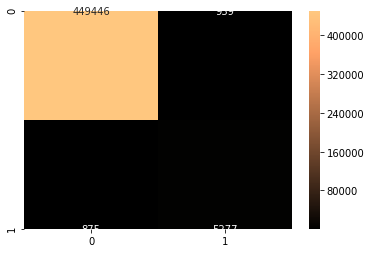

In [197]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(
    ['cano', 'bacno', 'txkey', 'locdt', 'fraud_ind'], axis=1),
                                                        training['fraud_ind'],
                                                        test_size=0.3,
                                                        random_state=112)

ad_data = training.drop(['cano', 'bacno', 'txkey', 'locdt'], axis=1)

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(ad_data['fraud_ind'].value_counts())

X_ad = ad_data.drop('fraud_ind', axis=1)
y_ad = ad_data['fraud_ind']
start = time()
# Oversampling the data using SMOTE

X_resampled_ad, y_resampled_ad = ADASYN(
    sampling_strategy='minority').fit_sample(X_ad, y_ad)
end = time()
print("No. of 0's and 1's in the feature Class After oversampling the data")
print(Counter(y_resampled_ad))
results = {}

# Initializng the dictionary to store performance metrics
results['ad'] = {}
results['ad']['resample_time'] = end - start

#X_resampled_ad, y_resampled_ad = RandomUnderSampler(sampling_strategy={1:200000,0:200000}).fit_resample(X_resampled_ad,y_resampled_ad)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_ad,
                                                    y_resampled_ad,
                                                    test_size=0.005,
                                                    random_state=112)

# Training the classifier
start = time()
clf_ad_BF = lig.LGBMClassifier(n_estimators=400,
                               reg_alpha=0.3,
                               num_leaves=100,
                               max_depth=16,
                               learning_rate=0.1,
                               reg_lambda=0.5,
                               subsample=0.7).fit(X_train,
                                                  y_train,
                                                  eval_set=[(X_train, y_train),
                                                            (X_test, y_test)],
                                                  eval_metric=cus_f1,
                                                  early_stopping_rounds=50)
end = time()
results['ad']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score_ad = clf_ad_BF.predict(X_test1)
y_score_ad = clf_ad_BF.predict(X_train1)

end = time()
results['ad']['pred_time'] = end - start

results['ad']['fbeta_train'] = fbeta_score(y_train1, y_score_ad, beta=2)
results['ad']['recall_train'] = recall_score(y_train1, y_score_ad)
results['ad']['precision_train'] = precision_score(y_train1, y_score_ad)

results['ad']['fbeta_test'] = fbeta_score(y_test1, y_pred_score_ad, beta=2)
results['ad']['recall_test'] = recall_score(y_test1, y_pred_score_ad)
results['ad']['precision_test'] = precision_score(y_test1, y_pred_score_ad)

print("Train Time:", results['ad']['train_time'])
print("Prediction Time:", results['ad']['pred_time'])
print("fbeta score_train:", results['ad']['fbeta_train'])
print('recall_score_train:', results['ad']['recall_train'])
print('precision_score_train:', results['ad']['precision_train'])

print('========================================================')
print("Train Time:", results['ad']['train_time'])
print("Prediction Time:", results['ad']['pred_time'])
print("fbeta score:", results['ad']['fbeta_test'])
print('recall_score:', results['ad']['recall_test'])
print('precision_score:', results['ad']['precision_test'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score_ad))

conf_matrix = confusion_matrix(y_test1, y_pred_score_ad)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

In [98]:
kcv = KFold(n_splits=5)
cross_val_score(lig_mo, X, Y, cv=kcv)

array([0.99148557, 0.99155597, 0.99149495, 0.99143394, 0.99169678])

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [100]:
def cus_f1(ytru, ypre):
    threshold = 0.5
    y_pre = [int(item > threshold) for item in ypre]
    f1 = f1_score(ytru, y_pre, average='macro')
    return 'f1', f1, True

In [101]:
lig_model = lig_mo.fit(X,Y
                    ,eval_set=[(X,Y),(tx,ty)]
                      ,eval_metric=cus_f1,early_stopping_rounds=50)

[1]	training's binary_logloss: 0.195421	training's f1: 0.609097	valid_1's binary_logloss: 0.194956	valid_1's f1: 0.609644
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.192306	training's f1: 0.609406	valid_1's binary_logloss: 0.192052	valid_1's f1: 0.609642
[3]	training's binary_logloss: 0.185949	training's f1: 0.609248	valid_1's binary_logloss: 0.186072	valid_1's f1: 0.609447
[4]	training's binary_logloss: 0.182123	training's f1: 0.609713	valid_1's binary_logloss: 0.182498	valid_1's f1: 0.60974
[5]	training's binary_logloss: 0.178601	training's f1: 0.610728	valid_1's binary_logloss: 0.179146	valid_1's f1: 0.61064
[6]	training's binary_logloss: 0.175416	training's f1: 0.611678	valid_1's binary_logloss: 0.176072	valid_1's f1: 0.611552
[7]	training's binary_logloss: 0.172932	training's f1: 0.612375	valid_1's binary_logloss: 0.173671	valid_1's f1: 0.612042
[8]	training's binary_logloss: 0.169686	training's f1: 0.613167	valid_1's binary_loglo

[68]	training's binary_logloss: 0.0958583	training's f1: 0.676058	valid_1's binary_logloss: 0.100488	valid_1's f1: 0.668841
[69]	training's binary_logloss: 0.0952208	training's f1: 0.677042	valid_1's binary_logloss: 0.0998979	valid_1's f1: 0.669725
[70]	training's binary_logloss: 0.09456	training's f1: 0.67775	valid_1's binary_logloss: 0.0992869	valid_1's f1: 0.670397
[71]	training's binary_logloss: 0.0940302	training's f1: 0.678363	valid_1's binary_logloss: 0.0987934	valid_1's f1: 0.670978
[72]	training's binary_logloss: 0.0935402	training's f1: 0.678922	valid_1's binary_logloss: 0.0983365	valid_1's f1: 0.671409
[73]	training's binary_logloss: 0.0931032	training's f1: 0.679568	valid_1's binary_logloss: 0.0979386	valid_1's f1: 0.671765
[74]	training's binary_logloss: 0.092549	training's f1: 0.680386	valid_1's binary_logloss: 0.0974085	valid_1's f1: 0.672425
[75]	training's binary_logloss: 0.0921108	training's f1: 0.680949	valid_1's binary_logloss: 0.0970139	valid_1's f1: 0.672837
[76]	

[134]	training's binary_logloss: 0.0674047	training's f1: 0.725627	valid_1's binary_logloss: 0.0740484	valid_1's f1: 0.709499
[135]	training's binary_logloss: 0.0671082	training's f1: 0.726405	valid_1's binary_logloss: 0.0737783	valid_1's f1: 0.710134
[136]	training's binary_logloss: 0.0667834	training's f1: 0.72701	valid_1's binary_logloss: 0.0735011	valid_1's f1: 0.710442
[137]	training's binary_logloss: 0.066589	training's f1: 0.727461	valid_1's binary_logloss: 0.0733193	valid_1's f1: 0.710793
[138]	training's binary_logloss: 0.0663651	training's f1: 0.727917	valid_1's binary_logloss: 0.0731179	valid_1's f1: 0.711244
[139]	training's binary_logloss: 0.0661435	training's f1: 0.728475	valid_1's binary_logloss: 0.0729099	valid_1's f1: 0.711732
[140]	training's binary_logloss: 0.0658316	training's f1: 0.729102	valid_1's binary_logloss: 0.0726073	valid_1's f1: 0.712442
[141]	training's binary_logloss: 0.0653931	training's f1: 0.730501	valid_1's binary_logloss: 0.0722019	valid_1's f1: 0.7

[200]	training's binary_logloss: 0.0512414	training's f1: 0.767161	valid_1's binary_logloss: 0.0594422	valid_1's f1: 0.740468
[201]	training's binary_logloss: 0.05099	training's f1: 0.768019	valid_1's binary_logloss: 0.0592144	valid_1's f1: 0.741169
[202]	training's binary_logloss: 0.0508542	training's f1: 0.768439	valid_1's binary_logloss: 0.0590894	valid_1's f1: 0.741397
[203]	training's binary_logloss: 0.0506098	training's f1: 0.769104	valid_1's binary_logloss: 0.0588609	valid_1's f1: 0.741841
[204]	training's binary_logloss: 0.0504007	training's f1: 0.769705	valid_1's binary_logloss: 0.0586819	valid_1's f1: 0.742308
[205]	training's binary_logloss: 0.0501055	training's f1: 0.770477	valid_1's binary_logloss: 0.0583976	valid_1's f1: 0.743158
[206]	training's binary_logloss: 0.0499214	training's f1: 0.771207	valid_1's binary_logloss: 0.0582334	valid_1's f1: 0.743704
[207]	training's binary_logloss: 0.0497404	training's f1: 0.771681	valid_1's binary_logloss: 0.0580726	valid_1's f1: 0.7

[266]	training's binary_logloss: 0.0397897	training's f1: 0.805517	valid_1's binary_logloss: 0.0491333	valid_1's f1: 0.768784
[267]	training's binary_logloss: 0.0396575	training's f1: 0.806077	valid_1's binary_logloss: 0.0490189	valid_1's f1: 0.769314
[268]	training's binary_logloss: 0.0395315	training's f1: 0.806506	valid_1's binary_logloss: 0.0489085	valid_1's f1: 0.769728
[269]	training's binary_logloss: 0.0394242	training's f1: 0.806829	valid_1's binary_logloss: 0.0488173	valid_1's f1: 0.769952
[270]	training's binary_logloss: 0.0391756	training's f1: 0.807968	valid_1's binary_logloss: 0.04858	valid_1's f1: 0.771137
[271]	training's binary_logloss: 0.0390183	training's f1: 0.808487	valid_1's binary_logloss: 0.0484246	valid_1's f1: 0.771732
[272]	training's binary_logloss: 0.0388906	training's f1: 0.809179	valid_1's binary_logloss: 0.048319	valid_1's f1: 0.77205
[273]	training's binary_logloss: 0.0388229	training's f1: 0.809365	valid_1's binary_logloss: 0.0482557	valid_1's f1: 0.772

[332]	training's binary_logloss: 0.0317245	training's f1: 0.838272	valid_1's binary_logloss: 0.04195	valid_1's f1: 0.792701
[333]	training's binary_logloss: 0.0316299	training's f1: 0.838551	valid_1's binary_logloss: 0.0418846	valid_1's f1: 0.792641
[334]	training's binary_logloss: 0.0315373	training's f1: 0.838856	valid_1's binary_logloss: 0.0418053	valid_1's f1: 0.793146
[335]	training's binary_logloss: 0.0314407	training's f1: 0.839424	valid_1's binary_logloss: 0.0417258	valid_1's f1: 0.793608
[336]	training's binary_logloss: 0.0313843	training's f1: 0.839586	valid_1's binary_logloss: 0.0416767	valid_1's f1: 0.793615
[337]	training's binary_logloss: 0.0312982	training's f1: 0.839901	valid_1's binary_logloss: 0.0415985	valid_1's f1: 0.793851
[338]	training's binary_logloss: 0.0312247	training's f1: 0.84031	valid_1's binary_logloss: 0.0415287	valid_1's f1: 0.794118
[339]	training's binary_logloss: 0.0310844	training's f1: 0.841098	valid_1's binary_logloss: 0.0414076	valid_1's f1: 0.79

[398]	training's binary_logloss: 0.026113	training's f1: 0.864564	valid_1's binary_logloss: 0.0371043	valid_1's f1: 0.811131
[399]	training's binary_logloss: 0.0260416	training's f1: 0.864924	valid_1's binary_logloss: 0.0370484	valid_1's f1: 0.811404
[400]	training's binary_logloss: 0.0259506	training's f1: 0.86548	valid_1's binary_logloss: 0.0369662	valid_1's f1: 0.811604
[401]	training's binary_logloss: 0.0258025	training's f1: 0.866312	valid_1's binary_logloss: 0.0368231	valid_1's f1: 0.812049
[402]	training's binary_logloss: 0.0257363	training's f1: 0.866606	valid_1's binary_logloss: 0.0367745	valid_1's f1: 0.812065
[403]	training's binary_logloss: 0.0256568	training's f1: 0.866803	valid_1's binary_logloss: 0.0367094	valid_1's f1: 0.81236
[404]	training's binary_logloss: 0.0256111	training's f1: 0.867059	valid_1's binary_logloss: 0.0366633	valid_1's f1: 0.812559
[405]	training's binary_logloss: 0.0255188	training's f1: 0.867502	valid_1's binary_logloss: 0.0365849	valid_1's f1: 0.81

[464]	training's binary_logloss: 0.0214812	training's f1: 0.887718	valid_1's binary_logloss: 0.0331843	valid_1's f1: 0.826278
[465]	training's binary_logloss: 0.0214095	training's f1: 0.888134	valid_1's binary_logloss: 0.0331248	valid_1's f1: 0.826605
[466]	training's binary_logloss: 0.0213633	training's f1: 0.88832	valid_1's binary_logloss: 0.0330828	valid_1's f1: 0.826708
[467]	training's binary_logloss: 0.0213376	training's f1: 0.888462	valid_1's binary_logloss: 0.0330627	valid_1's f1: 0.826749
[468]	training's binary_logloss: 0.02131	training's f1: 0.888528	valid_1's binary_logloss: 0.0330401	valid_1's f1: 0.82679
[469]	training's binary_logloss: 0.0212386	training's f1: 0.888879	valid_1's binary_logloss: 0.0329767	valid_1's f1: 0.826974
[470]	training's binary_logloss: 0.0211972	training's f1: 0.889055	valid_1's binary_logloss: 0.0329446	valid_1's f1: 0.826913
[471]	training's binary_logloss: 0.0211714	training's f1: 0.889242	valid_1's binary_logloss: 0.0329264	valid_1's f1: 0.826

[530]	training's binary_logloss: 0.0178363	training's f1: 0.907526	valid_1's binary_logloss: 0.0300748	valid_1's f1: 0.838303
[531]	training's binary_logloss: 0.0178116	training's f1: 0.90767	valid_1's binary_logloss: 0.0300526	valid_1's f1: 0.838395
[532]	training's binary_logloss: 0.0177689	training's f1: 0.907886	valid_1's binary_logloss: 0.030018	valid_1's f1: 0.838639
[533]	training's binary_logloss: 0.017723	training's f1: 0.908187	valid_1's binary_logloss: 0.0299864	valid_1's f1: 0.838949
[534]	training's binary_logloss: 0.0176759	training's f1: 0.908537	valid_1's binary_logloss: 0.0299522	valid_1's f1: 0.839066
[535]	training's binary_logloss: 0.017622	training's f1: 0.908936	valid_1's binary_logloss: 0.0299108	valid_1's f1: 0.839288
[536]	training's binary_logloss: 0.0175738	training's f1: 0.909166	valid_1's binary_logloss: 0.0298662	valid_1's f1: 0.839575
[537]	training's binary_logloss: 0.0175309	training's f1: 0.909335	valid_1's binary_logloss: 0.0298329	valid_1's f1: 0.839

[596]	training's binary_logloss: 0.015072	training's f1: 0.924037	valid_1's binary_logloss: 0.0278212	valid_1's f1: 0.849804
[597]	training's binary_logloss: 0.015048	training's f1: 0.924115	valid_1's binary_logloss: 0.027804	valid_1's f1: 0.849809
[598]	training's binary_logloss: 0.0150082	training's f1: 0.924426	valid_1's binary_logloss: 0.0277704	valid_1's f1: 0.84996
[599]	training's binary_logloss: 0.014977	training's f1: 0.924582	valid_1's binary_logloss: 0.0277477	valid_1's f1: 0.850197
[600]	training's binary_logloss: 0.014946	training's f1: 0.924959	valid_1's binary_logloss: 0.0277265	valid_1's f1: 0.850321
Did not meet early stopping. Best iteration is:
[600]	training's binary_logloss: 0.014946	training's f1: 0.924959	valid_1's binary_logloss: 0.0277265	valid_1's f1: 0.850321


In [106]:
yh = lig_model.predict(tx)
ypre = lig_model.predict(tx,raw_score=True)

In [107]:
ypre = (ypre > -1)*1

In [108]:
f1_score(ty,yh)

0.7056188656873724

In [106]:
yh = lig_model.predict(kaggle_,raw_score=True)
ypre = lig_model.predict(kaggle_)

In [1324]:
threshold =  0.3
y_pre = [int(item>threshold) for  item in ypre]

TypeError: only size-1 arrays can be converted to Python scalars

In [107]:
yh = (yh > -1)*1

In [108]:
ypre = pd.DataFrame(ypre,index=kaggle_.index)
yh = pd.DataFrame(yh,index=kaggle_.index)

In [109]:
ypre = pd.concat([ypre,kaggle_['txkey']],axis=1)
yh = pd.concat([yh,kaggle_['txkey']],axis=1)

In [110]:
aaa = kaggle_ans.merge(ypre)
bbb = kaggle_ans.merge(yh)

In [111]:
f1_score(aaa['fraud_ind'],aaa[0])

0.5930408472012102

In [112]:
f1_score(aaa['fraud_ind'],bbb[0])

0.6004213483146068

In [187]:
ypre = clf_over_sampled_lig.predict(testing.drop(['cano','bacno','txkey','locdt'],axis=1)) 
yh = clf_over_sampled_lig.predict(testing.drop(['cano','bacno','txkey','locdt'],axis=1),raw_score=True) 
yh = (yh > 3.5) * 1 

In [188]:
ypre = pd.DataFrame(ypre,index=testing.index) 
ypre = pd.concat([ypre,testing['txkey']],axis=1) 
b = sub.merge(ypre) 
yh = pd.DataFrame(yh,index=testing.index) 
yh = pd.concat([yh,testing['txkey']],axis=1) 
c = sub.merge(yh) 

In [189]:
b[0].sum()

51209.0

In [190]:
c[0].sum()

5837

In [191]:
c = sub.merge(yh)

In [1089]:
kaggle_ans['fraud_ind'].sum()

1568

In [192]:
c['fraud_ind'] = c[0]

In [193]:
c.drop(0,axis=1,inplace=True)

In [194]:
c

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0
...,...,...
421660,1187507,0
421661,1182598,0
421662,898724,0
421663,971467,0


In [195]:
c.to_csv('test13.csv')

In [193]:
sub

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0
5,592460,0
6,590160,0
7,592453,0
8,585745,0
9,592451,0


In [1094]:
kaggle_ans = kaggle_ans.reset_index()

In [141]:
b['fraud_ind'].sum()

36695.0

In [832]:
from sklearn.metrics import f1_score

In [1123]:
f1_score(aaa['fraud_ind'],aaa[0])

0.5585533869115958

In [950]:
confusion_matrix(ty,ypre)

array([[530045,   4070],
       [   974,   6487]], dtype=int64)

In [1124]:
print(classification_report(ty,ypre))

ValueError: Found input variables with inconsistent numbers of samples: [406182, 167847]

In [105]:
imp = lig_model.feature_importances_
imp_col = X.columns.tolist()
importance = pd.DataFrame(imp,index=imp_col)
importance.sort_values(0,ascending=False)

,0
comsum_max,4570
conam,4461
comsum_ave,4292
loctm,4014
comsum_total,3102
comsum_feq30,2564
day_trad_num,2544
day_comsum_total,2498
comsum_feq3060,2323
comsum_feq60,2070


# Min & Max comsum

In [497]:
grp = data_all.groupby(['bacno'])['conam'].min().reset_index().rename(columns={'conam':'comsum_min'})
data_all = data_all.merge(grp,how='outer')
grp = data_all.groupby(['bacno'])['conam'].max().reset_index().rename(columns={'conam':'comsum_max'})
data_all = data_all.merge(grp,how='outer')

# Total & Average of num per custom trade times

In [498]:
grp = (data_all.groupby(['bacno'])['txkey'].count() / data_all['locdt'].max()).reset_index().rename(columns={'txkey':'acc_trad_ave'})
data_all = data_all.merge(grp,how='outer')
grp = data_all.groupby(['bacno'])['txkey'].count().reset_index().rename(columns={'txkey':'acc_trad_total'})
data_all = data_all.merge(grp,how='outer')

# Total & Average payment per custom

In [499]:
grp = data_all.groupby(['bacno'])['conam'].sum().reset_index().rename(columns={'conam':'comsum_total'})
data_all = data_all.merge(grp,how='outer')
grp = data_all.groupby(['bacno'])['conam'].mean().reset_index().rename(columns={'conam':'comsum_ave'})
data_all = data_all.merge(grp,how='outer')

In [500]:
data_all.shape

(1943452, 29)

# every 30days trade frequency 

In [501]:
day30 = data_all[data_all['locdt'] <= 30]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq30'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq30'].fillna(0,inplace=True)

day30 = data_all[(data_all['locdt'] <= 60) & (data_all['locdt'] >30 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq3060'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq3060'].fillna(0,inplace=True)

day30 = data_all[(data_all['locdt'] <= 90) & (data_all['locdt'] >60 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq6090'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq6090'].fillna(0,inplace=True)

day30 = data_all[(data_all['locdt'] <= 120) & (data_all['locdt'] >90 ) ]
grp = (day30.groupby(['bacno'])['txkey'].count() / 30).reset_index().rename(columns={'txkey':'comsum_feq90120'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq90120'].fillna(0,inplace=True)


# every 60days trade frequency

In [502]:
day60 = data_all[data_all['locdt'] <= 60]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq60'].fillna(0,inplace=True)

day60 = data_all[(data_all['locdt'] <= 90) & (data_all['locdt'] >30 ) ]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq3090'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq3090'].fillna(0,inplace=True)

day60 = data_all[(data_all['locdt'] <= 120) & (data_all['locdt'] >60 ) ]
grp = (day60.groupby(['bacno'])['txkey'].count() / 60).reset_index().rename(columns={'txkey':'comsum_feq60120'})
data_all = data_all.merge(grp,how='outer')
data_all['comsum_feq60120'].fillna(0,inplace=True)

# 每日交易次數、金額

In [503]:
grp = data_all.groupby(['locdt'])['bacno'].count().reset_index().rename(columns={'bacno':'day_trad_num'})
data_all = data_all.merge(grp,how='outer')
grp = data_all.groupby(['locdt'])['conam'].sum().reset_index().rename(columns={'conam':'day_comsum_total'})
data_all = data_all.merge(grp,how='outer')

# 網路交易和國家&城市 cross

In [504]:
data_all['ecfg_stocn'] = data_all['ecfg'] + data_all['stocn'].astype('str')
data_all['ecfg_scity'] = data_all['ecfg'] + data_all['scity'].astype('str')

# 超額註記和國家&城市 cross

In [505]:
data_all['ovrlt_stocn'] = data_all['ovrlt'] + data_all['stocn'].astype('str')
data_all['ovrlt_scity'] = data_all['ovrlt'] + data_all['stocn'].astype('str')

# 日期轉換成星期

In [506]:
data_all['week'] = data_all['locdt']
data_all['week'] = data_all['week'] % 7 

# 天轉換成小時

In [507]:
data_all['trad_hour'] = data_all['loctm'] // 10000

# 小時轉換成上午中午下午 ( code on desktop )

In [508]:
data_all['morning'] = ((data_all['trad_hour'] < 12) & (data_all['trad_hour'] >=6)).replace([True,False],[1,0])
data_all['afternoon'] = ((data_all['trad_hour'] < 18) & (data_all['trad_hour'] >=12)).replace([True,False],[1,0])
data_all['night'] = ((data_all['trad_hour'] < 24) & (data_all['trad_hour'] >=18)).replace([True,False],[1,0])
data_all['midnight'] = ((data_all['trad_hour'] < 6) & (data_all['trad_hour'] >=0)).replace([True,False],[1,0])

# 國家是否台灣 ( code on desktop)

In [509]:
data_all['is_taiwan'] = (data_all['stocn'] == 102).replace([True,False],[1,0])

# 消費次數(依照每個國家、城市消費次數)

In [510]:
grp = data_all.groupby(['stocn'])['txkey'].count().reset_index().rename(columns={'txkey':'country_com_num'})
data_all = data_all.merge(grp,how='outer')

grp = data_all.groupby(['scity'])['txkey'].count().reset_index().rename(columns={'txkey':'city_com_num'})
data_all = data_all.merge(grp,how='outer')

# 填補na 將flbmk 為na  直接視為無盜刷 ( 統計發現flbmk為na值 盜刷機率並無上升)

In [511]:
pre_predict = data_all[data_all['flbmk'].isna() == True]

# drop na data

In [512]:
training = data_all[data_all['fraud_ind'].isna() == False]
testing = data_all[data_all['fraud_ind'].isna() == True]

In [513]:
print('train',training.shape , 'test', testing.shape)

train (1521787, 51) test (421665, 51)


In [514]:
print('o_train',train.shape,'o_test',test.shape)

o_train (1521787, 23) o_test (421665, 22)


In [515]:
training = training.dropna(axis=0)
testing = testing.drop('fraud_ind',axis=1)
testing = testing.dropna(axis=0)

In [516]:
print('train',training.shape , 'test', testing.shape)

train (1509206, 51) test (417950, 50)


In [ ]:
object_list = []
int_list = []
float_list = []
for col in data_all.columns.tolist() :
    if data_all[col].dtype == 'object' :
        object_list.append(col)
    if data_all[col].dtype == 'int64'  :
        int_list.append(col)
    if data_all[col].dtype == 'float64' :
        float_list.append(col)

In [ ]:
for col in nd_ont_list :
    data_all =pd.concat([data_all] + [pd.get_dummies(data_all[col],prefix=col)] ,axis=1)

In [780]:
len(ypre)

421665

In [685]:
ans = pd.DataFrame(ypre,index=testing['txkey'])

In [686]:
ans = ans.reset_index()

In [687]:
ans = ans.set_index(testing.index)

0         0
1         0
2         0
3         0
4         0
         ..
421660    0
421661    0
421662    0
421663    0
421664    0
Name: fraud_ind, Length: 421665, dtype: int64

In [36]:
sub = pd.read_csv('./data/submission_test.csv')

In [782]:
sub['fraud_ind'] = ypre

In [783]:
sub.shape

(421665, 2)

In [701]:
ans = sub.merge(ans,how='outer')

In [702]:
ans[0].fillna(0.0,inplace=True)

In [705]:
ans['fraud_ind'] = ans[0]

In [707]:
ans.drop(0,axis=1,inplace=True)

In [718]:
ans['fraud_ind'] = ans['fraud_ind'].astype('int64')

In [787]:
sub['fraud_ind'].sum()

24525.0

In [786]:
sub.to_csv('test04.csv')

In [439]:
2|8

10

In [447]:
(train['flbmk'].isna()==True).sum()

12581

In [448]:
200/12581

0.015896987520864797

In [449]:
len(train)

1521787

In [450]:
train['fraud_ind'].sum()

20355

In [451]:
20355/1521787

0.013375722095142093

# resample

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class after oversampling the data
0.0    1501432
1.0    1000000
Name: fraud_ind, dtype: int64
Training set has 1500859 samples.
Testing set has 1000573 samples.
Train Time: 28.721435546875
Prediction Time: 1.8661365509033203
fbeta score: 0.7963054123377465
recall_score: 0.9991872561768531
precision_score: 0.43941668453785115

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    450385
         1.0       0.44      1.00      0.61      6152

    accuracy                           0.98    456537
   macro avg       0.72      0.99      0.80    456537
weighted avg       0.99      0.98      0.99    456537



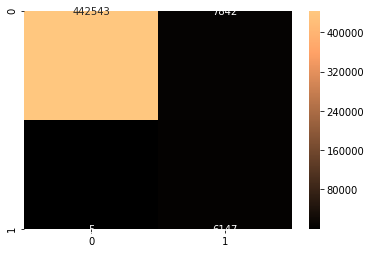

In [131]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(['cano','bacno','txkey','locdt','fraud_ind'], axis=1), 
                                                    training['fraud_ind'], 
                                                    test_size = 0.3, 
                                                    random_state = 112)


resample_data = training.drop(['cano','bacno','txkey','locdt'], axis=1)

results = {}

results['oversampled']={}

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(resample_data['fraud_ind'].value_counts())


data_majority = resample_data[resample_data['fraud_ind'] == 0]
data_minority = resample_data[resample_data['fraud_ind'] == 1]

data_minority_oversampled  = resample(data_minority, 
                                 replace=True,     
                                 n_samples=1000000, 
                                 random_state=112) 
 
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("No. of 0's and 1's in the feature Class after oversampling the data")
 
print(data_oversampled['fraud_ind'].value_counts())

y = data_oversampled['fraud_ind']
X = data_oversampled.drop('fraud_ind', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.4, 
                                                    random_state = 112)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

start = time()
#Training the Classifier
clf_over_sampled_lig = lig.LGBMClassifier(n_estimators=300,reg_alpha=0.3,num_leaves=100,learning_rate=0.1,reg_lambda=0.5,subsample=0.7).fit(X_train, y_train)
end = time()
results['oversampled']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score = clf_over_sampled_lig.predict(X_test1)
end = time()
results['oversampled']['pred_time'] = end - start

results['oversampled']['fbeta'] = fbeta_score(y_test1,y_pred_score,beta=2)
results['oversampled']['recall']= recall_score(y_test1,y_pred_score)
results['oversampled']['precision'] = precision_score(y_test1,y_pred_score)


print ("Train Time:", results['oversampled']['train_time'])
print ("Prediction Time:", results['oversampled']['pred_time'])
print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score))

conf_matrix = confusion_matrix(y_test1,y_pred_score)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class after oversampling the data
0.0    1501432
1.0    1000000
Name: fraud_ind, dtype: int64
Training set has 2001145 samples.
Testing set has 500287 samples.
Train Time: 39.03973054885864
Prediction Time: 1.9922878742218018
fbeta score: 0.8043751308352521
recall_score: 0.9993498049414824
precision_score: 0.45179306290417404

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    450385
         1.0       0.45      1.00      0.62      6152

    accuracy                           0.98    456537
   macro avg       0.73      0.99      0.81    456537
weighted avg       0.99      0.98      0.99    456537



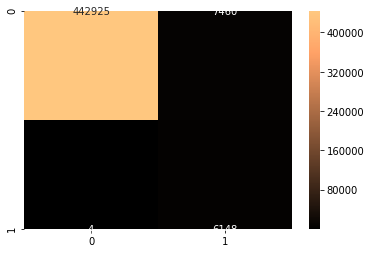

In [132]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(['cano','bacno','txkey','locdt','fraud_ind'], axis=1), 
                                                    training['fraud_ind'], 
                                                    test_size = 0.3, 
                                                    random_state = 112)


resample_data = training.drop(['cano','bacno','txkey','locdt'], axis=1)

results = {}

results['oversampled']={}

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(resample_data['fraud_ind'].value_counts())


data_majority = resample_data[resample_data['fraud_ind'] == 0]
data_minority = resample_data[resample_data['fraud_ind'] == 1]

data_minority_oversampled  = resample(data_minority, 
                                 replace=True,     
                                 n_samples=1000000, 
                                 random_state=112) 
 
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("No. of 0's and 1's in the feature Class after oversampling the data")
 
print(data_oversampled['fraud_ind'].value_counts())

y = data_oversampled['fraud_ind']
X = data_oversampled.drop('fraud_ind', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 112)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

start = time()
#Training the Classifier
clf_over_sampled_lig = lig.LGBMClassifier(n_estimators=300,reg_alpha=0.3,num_leaves=100,learning_rate=0.1,reg_lambda=0.5,subsample=0.7).fit(X_train, y_train)
end = time()
results['oversampled']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score = clf_over_sampled_lig.predict(X_test1)
end = time()
results['oversampled']['pred_time'] = end - start

results['oversampled']['fbeta'] = fbeta_score(y_test1,y_pred_score,beta=2)
results['oversampled']['recall']= recall_score(y_test1,y_pred_score)
results['oversampled']['precision'] = precision_score(y_test1,y_pred_score)


print ("Train Time:", results['oversampled']['train_time'])
print ("Prediction Time:", results['oversampled']['pred_time'])
print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score))

conf_matrix = confusion_matrix(y_test1,y_pred_score)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class after oversampling the data
0.0    1501432
1.0     700000
Name: fraud_ind, dtype: int64
Training set has 1981288 samples.
Testing set has 220144 samples.
Train Time: 41.471346378326416
Prediction Time: 2.0518805980682373
fbeta score: 0.8346956569124299
recall_score: 0.9959362808842653
precision_score: 0.5066148503390111

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    450385
         1.0       0.51      1.00      0.67      6152

    accuracy                           0.99    456537
   macro avg       0.75      0.99      0.83    456537
weighted avg       0.99      0.99      0.99    456537



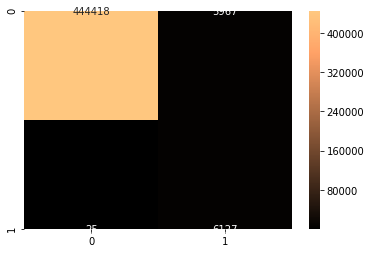

In [147]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(['cano','bacno','txkey','locdt','fraud_ind'], axis=1), 
                                                    training['fraud_ind'], 
                                                    test_size = 0.3, 
                                                    random_state = 112)


resample_data = training.drop(['cano','bacno','txkey','locdt'], axis=1)

results = {}

results['oversampled']={}

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(resample_data['fraud_ind'].value_counts())


data_majority = resample_data[resample_data['fraud_ind'] == 0]
data_minority = resample_data[resample_data['fraud_ind'] == 1]

data_minority_oversampled  = resample(data_minority, 
                                 replace=True,     
                                 n_samples=700000, 
                                 random_state=112) 
 
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("No. of 0's and 1's in the feature Class after oversampling the data")
 
print(data_oversampled['fraud_ind'].value_counts())

y = data_oversampled['fraud_ind']
X = data_oversampled.drop('fraud_ind', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    random_state = 112)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

start = time()
#Training the Classifier
clf_over_sampled_lig = lig.LGBMClassifier(n_estimators=300,reg_alpha=0.3,num_leaves=100,learning_rate=0.1,reg_lambda=0.5,subsample=0.7).fit(X_train, y_train)
end = time()
results['oversampled']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score = clf_over_sampled_lig.predict(X_test1)
end = time()
results['oversampled']['pred_time'] = end - start

results['oversampled']['fbeta'] = fbeta_score(y_test1,y_pred_score,beta=2)
results['oversampled']['recall']= recall_score(y_test1,y_pred_score)
results['oversampled']['precision'] = precision_score(y_test1,y_pred_score)


print ("Train Time:", results['oversampled']['train_time'])
print ("Prediction Time:", results['oversampled']['pred_time'])
print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score))

conf_matrix = confusion_matrix(y_test1,y_pred_score)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class after oversampling the data
0.0    1501432
1.0    1000000
Name: fraud_ind, dtype: int64
Training set has 2476417 samples.
Testing set has 25015 samples.
Train Time: 48.08730125427246
Prediction Time: 1.877608299255371
fbeta score: 0.8093795283888817
recall_score: 0.9986996098829649
precision_score: 0.4603281636322769

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    450385
         1.0       0.46      1.00      0.63      6152

    accuracy                           0.98    456537
   macro avg       0.73      0.99      0.81    456537
weighted avg       0.99      0.98      0.99    456537



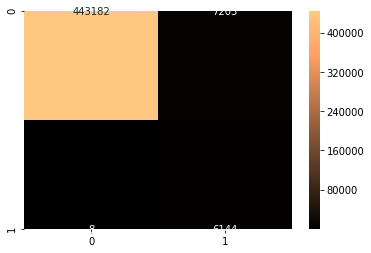

In [133]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(['cano','bacno','txkey','locdt','fraud_ind'], axis=1), 
                                                    training['fraud_ind'], 
                                                    test_size = 0.3, 
                                                    random_state = 112)


resample_data = training.drop(['cano','bacno','txkey','locdt'], axis=1)

results = {}

results['oversampled']={}

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(resample_data['fraud_ind'].value_counts())


data_majority = resample_data[resample_data['fraud_ind'] == 0]
data_minority = resample_data[resample_data['fraud_ind'] == 1]

data_minority_oversampled  = resample(data_minority, 
                                 replace=True,     
                                 n_samples=1000000, 
                                 random_state=112) 
 
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("No. of 0's and 1's in the feature Class after oversampling the data")
 
print(data_oversampled['fraud_ind'].value_counts())

y = data_oversampled['fraud_ind']
X = data_oversampled.drop('fraud_ind', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.01, 
                                                    random_state = 112)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

start = time()
#Training the Classifier
clf_over_sampled_lig = lig.LGBMClassifier(n_estimators=300,reg_alpha=0.3,num_leaves=100,learning_rate=0.1,reg_lambda=0.5,subsample=0.7).fit(X_train, y_train)
end = time()
results['oversampled']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score = clf_over_sampled_lig.predict(X_test1)
end = time()
results['oversampled']['pred_time'] = end - start

results['oversampled']['fbeta'] = fbeta_score(y_test1,y_pred_score,beta=2)
results['oversampled']['recall']= recall_score(y_test1,y_pred_score)
results['oversampled']['precision'] = precision_score(y_test1,y_pred_score)


print ("Train Time:", results['oversampled']['train_time'])
print ("Prediction Time:", results['oversampled']['pred_time'])
print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score))

conf_matrix = confusion_matrix(y_test1,y_pred_score)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

# logistic

No. of 0's and 1's in the feature Class before oversampling the data
0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64
No. of 0's and 1's in the feature Class after oversampling the data
0.0    1501432
1.0    1000000
Name: fraud_ind, dtype: int64
Training set has 2376360 samples.
Testing set has 125072 samples.
Train Time: 210.37633347511292
Prediction Time: 0.10372519493103027
fbeta score: 0.3447415503328749
recall_score: 0.9208387516254877
precision_score: 0.09842759099991312

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94    450385
         1.0       0.10      0.92      0.18      6152

    accuracy                           0.89    456537
   macro avg       0.55      0.90      0.56    456537
weighted avg       0.99      0.89      0.93    456537



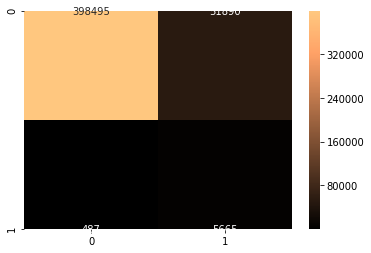

In [145]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(training.drop(['cano','bacno','txkey','locdt','fraud_ind'], axis=1), 
                                                    training['fraud_ind'], 
                                                    test_size = 0.3, 
                                                    random_state = 112)


resample_data = training.drop(['cano','bacno','txkey','locdt'], axis=1)

results = {}

results['oversampled']={}

print("No. of 0's and 1's in the feature Class before oversampling the data")
print(resample_data['fraud_ind'].value_counts())


data_majority = resample_data[resample_data['fraud_ind'] == 0]
data_minority = resample_data[resample_data['fraud_ind'] == 1]

data_minority_oversampled  = resample(data_minority, 
                                 replace=True,     
                                 n_samples=1000000, 
                                 random_state=112) 
 
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("No. of 0's and 1's in the feature Class after oversampling the data")
 
print(data_oversampled['fraud_ind'].value_counts())

y = data_oversampled['fraud_ind']
X = data_oversampled.drop('fraud_ind', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.05, 
                                                    random_state = 112)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

start = time()
#Training the Classifier
clf_over_sampled_lig = LogisticRegression(C=0.3,penalty="l2",solver='newton-cg').fit(X_train, y_train)
end = time()
results['oversampled']['train_time'] = end - start

# Predict on training set
start = time()
y_pred_score = clf_over_sampled_lig.predict(X_test1)
end = time()
results['oversampled']['pred_time'] = end - start

results['oversampled']['fbeta'] = fbeta_score(y_test1,y_pred_score,beta=2)
results['oversampled']['recall']= recall_score(y_test1,y_pred_score)
results['oversampled']['precision'] = precision_score(y_test1,y_pred_score)


print ("Train Time:", results['oversampled']['train_time'])
print ("Prediction Time:", results['oversampled']['pred_time'])
print ("fbeta score:", results['oversampled']['fbeta'])
print('recall_score:', results['oversampled']['recall'])
print('precision_score:', results['oversampled']['precision'])

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test1, y_pred_score))

conf_matrix = confusion_matrix(y_test1,y_pred_score)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()